# Topic:  Prediction of Survivability in patients with Sepsis

Name: Adison Goh

Sepsis is a potentially life-threatening condition that occurs when the body launches an exaggerated response to an infection, resulting in damage to its own tissues. Without early treatment with antibiotics and intravenous fluids, sepsis may progress to septic shock, leading to a drop in blood pressure that can lead to severe organ problems and death. Hence, it is imperative to identify patients at high risk of death, so that the necessary medical attention and treatment may be provided to improve chances of survival.

This project aims to use machine learning to predict the survival of patients with sepsis. The Sepsis Survival Clinical Records dataset obtained from the UCI Machine Learning Repository will be used in this project. The dataset contains data of 110204 patients from Norway and 137 patients from South Korea (total 110341). This will be a **binary-classification** project, whereby 3 features from the dataset (Age, Gender & Number of Sepsis Episodes) will be used to predict a binary outcome, where the patient (i) survived or (ii) passed away.

===

*Data source:* <br> UCI Machine Learning Repository, Sepsis Survival Clinical Records Data Set <br> http://archive.ics.uci.edu/ml/datasets/Sepsis+survival+minimal+clinical+records

## 1. Import Libraries & Loading the Dataset

In [ ]:
# Importing the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from google.colab import files

The dataset contained 2 csv files:


*   "sepsis_survival_primary_cohort": based on patients from Norway
*   "sepsis_survival_validation_cohort": based on patients from South Korea



In [ ]:
# import sepsis_primary dataset & read into a pandas dataframe
data_to_load = files.upload()
sepsis_primary = pd.read_csv('sepsis_survival_primary_cohort.csv')

print(sepsis_primary.shape)

Saving sepsis_survival_primary_cohort.csv to sepsis_survival_primary_cohort.csv
(110204, 4)


In [ ]:
# import sepsis_validation dataset & read into a pandas dataframe
data_to_load = files.upload()
sepsis_validation = pd.read_csv('sepsis_survival_validation_cohort.csv')

print(sepsis_validation.shape)

Saving sepsis_survival_validation_cohort.csv to sepsis_survival_validation_cohort.csv
(137, 4)


In [ ]:
# Copy the dataframe
sepsis_primary_data = sepsis_primary.copy()
sepsis_validation_data = sepsis_validation.copy()

## 2. Feature Description & Data Exploration
Description of Features: 
*   **age_years:** Age (in years) of the subject [integer]
*   **sex_0male_1female:** Gender of the subject - 0 represents Male, 1 represents Female [binary]
*   **episode_number:** Subject's n-th episode of sepsis [integer]

Description of Label (Outcome):
*   **hospital_outcome_1alive_0dead:** Outcome during that hospital episode - 0 represents that the patient is deceased, 1 represents that the patient survived [binary]





For this project, we will combine both dataframes as we will not distinguish between the source country for the data ("sepsis_survival_primary_cohort" involving patients from Norway, and "sepsis_survival_validation_cohort" involving patients from South Korea).

The dataset will be split for training or testing later on.

In [ ]:
# Combine primary (norway) and validation (south korea) dataset
sepsis_data = pd.concat([sepsis_primary_data, sepsis_validation_data])

# Check the shape after combining & view the first 5 rows of the dataset
print(sepsis_data.shape)
print(sepsis_data.head())

(110341, 4)
   age_years  sex_0male_1female  episode_number  hospital_outcome_1alive_0dead
0         21                  1               1                              1
1         20                  1               1                              1
2         21                  1               1                              1
3         77                  0               1                              1
4         72                  0               1                              1


In total, there are 110341 rows (110204 from Norway + 137 from South Korea).

In [ ]:
# Rename columns for clarity
sepsis_data.rename(columns={"sex_0male_1female": "gender", "hospital_outcome_1alive_0dead": "hospital_outcome"}, inplace=True)

print(sepsis_data.head())

   age_years  gender  episode_number  hospital_outcome
0         21       1               1                 1
1         20       1               1                 1
2         21       1               1                 1
3         77       0               1                 1
4         72       0               1                 1


In [ ]:
# Shuffle the rows in the dataset
sepsis_data = sepsis_data.sample(frac=1, random_state=10)

print(sepsis_data.shape)
print(sepsis_data.head())

(110341, 4)
       age_years  gender  episode_number  hospital_outcome
80783         35       1               1                 1
72558          4       1               1                 1
98948         70       0               1                 1
46247         76       1               1                 1
91019          1       1               1                 1


Check for missing values in the dataset. Based on the output, all four features have non-null counts of 110341, which is equal to the total number of rows in the dataset. 

As there are no null values in this dataset, no further data cleaning is required.

In [ ]:
# Check for missing values
sepsis_data.info()

# no null values observed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110341 entries, 80783 to 83209
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   age_years         110341 non-null  int64
 1   gender            110341 non-null  int64
 2   episode_number    110341 non-null  int64
 3   hospital_outcome  110341 non-null  int64
dtypes: int64(4)
memory usage: 4.2 MB


In [ ]:
sepsis_data.describe()

,age_years,gender,episode_number,hospital_outcome
count,110341.000000,110341.000000,110341.000000,110341.000000
mean,62.731288,0.473786,1.349145,0.926328
std,24.118424,0.499315,0.751472,0.261237
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


Plot a histogram to view the age distribution of patients in the dataset.

The average age of patients is 62.73 years old, and the median is 68 years old. Based on the histogram, it appears that there is age distribution is negatively skewed. The five most common ages of patients in the dataset is between 80-84 years old. This is plausible as the elderly may be more susceptible to health-related conditions.

Age distribution:
82     2666
84     2623
81     2541
83     2524
80     2521
       ... 
10      159
14      153
13      151
100     128
99       84
Name: age_years, Length: 101, dtype: int64 



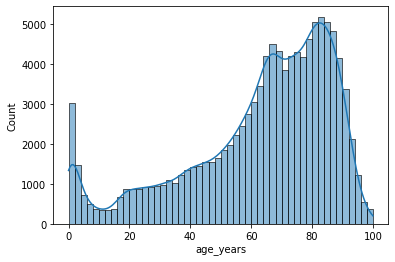

In [ ]:
print("Age distribution:")
print(sepsis_data['age_years'].value_counts(), "\n")

# Distribution plot of age
sns.histplot(sepsis_data['age_years'], stat='count', bins=50, kde=True)
plt.show()

Based on the graph below, it appears that gender of patients in the dataset are evenly distributed, with 52.6% being Male & 47.4% Female.

Gender:
0    0.526214
1    0.473786
Name: gender, dtype: float64 



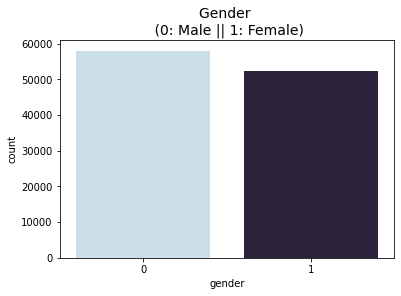

In [ ]:
# 0 represents Male, 1 represents Female 

print("Gender:")
print(sepsis_data['gender'].value_counts(normalize=True), "\n")

# Plot gender counts
sns.countplot(x=sepsis_data['gender'], palette="ch:s=.25,rot=-.25")
plt.title('Gender \n (0: Male || 1: Female)', fontsize=14)

plt.show()

Based on the graph, the plot is positively skewed, where there are sizably more patients having their first episode (76.97%) or second episode (15.14%) of sepsis as compared to third (4.90%), fourth (1.99%) or fifth (1.00%) episodes.

Episode Number:
1    0.769669
2    0.151440
3    0.048966
4    0.019929
5    0.009996
Name: episode_number, dtype: float64 



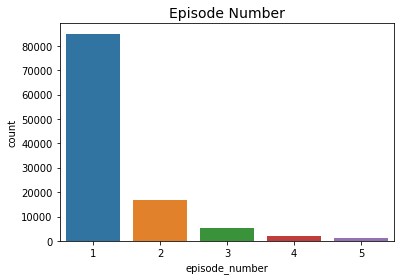

In [ ]:
print("Episode Number:")
print(sepsis_data['episode_number'].value_counts(normalize=True), "\n")

# Plot episode number counts
sns.countplot(x=sepsis_data['episode_number'])
plt.title('Episode Number', fontsize=14)

plt.show()

The survival outcome is very imbalanced. 92.63% of patients with sepsis survived, but only 7.37% of patients were deceased.



Hospital Outcome:
1    0.926328
0    0.073672
Name: hospital_outcome, dtype: float64 



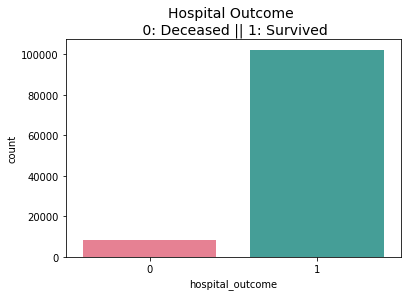

In [ ]:
print("Hospital Outcome:")
print(sepsis_data['hospital_outcome'].value_counts(normalize=True),"\n")

# Plot Outcomes
sns.countplot(x=sepsis_data['hospital_outcome'], palette="husl")
plt.title('Hospital Outcome \n 0: Deceased || 1: Survived', fontsize=14)

plt.show()

As the rate of death in patients with sepsis is relatively uncommon and the dataset is skewed towards the survival, there is a risk that this model may overfit towards the majority class (Class 1, Survived). If required, strategies to manage imbalanced classes may be needed (will be discussed in a later segment). 

## 3. Preparing the Dataset for Training

### 3.1 Separate Dataframe into Features & Label

In [ ]:
# Create sepsis_data_Y to store the label (hospital_outcome)
sepsis_data_Y = sepsis_data['hospital_outcome']

print(sepsis_data_Y.shape)
print(sepsis_data_Y.head())

# Pandas Series

(110341,)
80783    1
72558    1
98948    1
46247    1
91019    1
Name: hospital_outcome, dtype: int64


In [ ]:
# Create sepsis_data_X to store the features
sepsis_data_X = sepsis_data.iloc[:, 0:3]

print(sepsis_data_X.shape)
print(sepsis_data_X.head())

# Pandas dataframe

(110341, 3)
       age_years  gender  episode_number
80783         35       1               1
72558          4       1               1
98948         70       0               1
46247         76       1               1
91019          1       1               1


### 3.2 One Hot Encoding of Categorical Data

Gender is a categorical feature, where 0 (male) or 1 (female) does not represent any specific order. To prevent the model from inappropriately misinterpreting any specific order, one-hot encoding will be performed for the Gender feature.

In [ ]:
# Encode categorical features (gender)
sepsis_data_X_categorical = ['gender']
sepsis_data_X = pd.get_dummies(sepsis_data_X, columns=sepsis_data_X_categorical)

print(sepsis_data_X.shape)
print(sepsis_data_X.head())

(110341, 4)
       age_years  episode_number  gender_0  gender_1
80783         35               1         0         1
72558          4               1         0         1
98948         70               1         1         0
46247         76               1         0         1
91019          1               1         0         1


In [ ]:
# Rename gender columns for clarity
# gender_0 -> gender_male
# gender_1 -> gender_female
sepsis_data_X.rename(columns={"gender_0": "gender_male", "gender_1": "gender_female"}, inplace=True)

print(sepsis_data_X.head())

       age_years  episode_number  gender_male  gender_female
80783         35               1            0              1
72558          4               1            0              1
98948         70               1            1              0
46247         76               1            0              1
91019          1               1            0              1


In [ ]:
sepsis_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110341 entries, 80783 to 83209
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   age_years       110341 non-null  int64
 1   episode_number  110341 non-null  int64
 2   gender_male     110341 non-null  uint8
 3   gender_female   110341 non-null  uint8
dtypes: int64(2), uint8(2)
memory usage: 6.8 MB


### 3.3 Splitting the dataset with train_test_split

The the dataset will now be split into a training (80%) & testing (20%) dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset for training (80%) & testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(sepsis_data_X, sepsis_data_Y, test_size = 0.2, random_state = 10)

# Print the shape of the training & testing dataset
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (88272, 4)
X_test: (22069, 4)
Y_train: (88272,)
Y_test: (22069,)


In [ ]:
# Verify that distribution of labels are approximately equal
# 0: Deceased, 1: Survived

print("Training Targets:")
print(pd.DataFrame(Y_train).value_counts(sort=False, normalize=True))

print("\nTesting Targets:")
print(pd.DataFrame(Y_test).value_counts(sort=False, normalize=True))

Training Targets:
hospital_outcome
0                   0.073126
1                   0.926874
dtype: float64

Testing Targets:
hospital_outcome
0                   0.075853
1                   0.924147
dtype: float64


After splitting the dataset, there are now 88272 rows (80%) in the training dataset, and 22069 (20%) in the testing dataset.

The distribution of survival (label) outcomes in the training and testing dataset were approximately equal, with death rate being 7.31% and 7.59% respectively (overall death rate is 7.37%).

### 3.4 Feature Scaling

As the input numerical attributes have different range of values, StandardScaler will be applied. This is to prevent features with larger magnitudes from dominating the objective function during the training process.

StandardScaler will be fitted using the training dataset, and then used to transform both the features in the training (X_train) & testing (X_test) set. This is done to prevent data leakage to the testing dataset.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the StandardScaler using the training (X_train) dataset
# Then, scale both X_train & X_test 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Convert the ndarray back into a pandas dataframe
X_train = pd.DataFrame(X_train, columns = ['age_years','episode_number','gender_male', 'gender_female'])
X_test = pd.DataFrame(X_test, columns = ['age_years','episode_number','gender_male', 'gender_female'])

print(X_train.shape)
print(X_train, "\n")
print(X_test.shape)
print(X_test)

(88272, 4)
       age_years  episode_number  gender_male  gender_female
0       0.177157        -0.46385     0.946938      -0.946938
1      -0.402427        -0.46385     0.946938      -0.946938
2       0.963735        -0.46385    -1.056036       1.056036
3      -0.154034        -0.46385    -1.056036       1.056036
4      -2.596566        -0.46385     0.946938      -0.946938
...          ...             ...          ...            ...
88267   0.632544        -0.46385     0.946938      -0.946938
88268  -0.112635        -0.46385    -1.056036       1.056036
88269  -1.271803        -0.46385    -1.056036       1.056036
88270  -1.478797        -0.46385    -1.056036       1.056036
88271  -0.154034        -0.46385     0.946938      -0.946938

[88272 rows x 4 columns] 

(22069, 4)
       age_years  episode_number  gender_male  gender_female
0      -0.485225        -0.46385    -1.056036       1.056036
1       0.715342        -0.46385    -1.056036       1.056036
2       0.591145        -0.46385   

## 4. Predictive Modelling (Classical ML Methods)

Four classic machine learning models will be evaluated:

1.   Logistic Regression
2.   K-Nearest Neighbours
3.   Random Forest
4.   SVM



### 4.0 Define a function for Evaluation - **"evaluate_model"**

In [ ]:
# Import sklearn models that will be used for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Define a function to evaluate the model, including:

*   Computing accuracy, precision, recall, F1
*   Computing ROC-AUC score
*   Computing the confusion matrix



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

# Define function to measure error
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)


# Define function to evaluate model & display confusion matrix
def evaluate_model(model):
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Compute accuracy, precision, recall, F1
    train_test_error = pd.concat([measure_error(Y_train, Y_train_pred, 'train'),
                                    measure_error(Y_test, Y_test_pred, 'test')],
                                    axis=1)
 
    # Compute ROC-AUC score
    Y_test_score = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_test_score)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    print(train_test_error, "\n")
    print("ROC-AUC score:", auc_score, "\n")
    print(classification_report(Y_test, Y_test_pred), "\n")

    return disp.plot()

### 4.1 Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetr

              train      test
accuracy   0.926874  0.924147
precision  0.859095  0.854048
recall     0.926874  0.924147
f1         0.891698  0.887716 

ROC-AUC score: 0.7068987262614733 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1674
           1       0.92      1.00      0.96     20395

    accuracy                           0.92     22069
   macro avg       0.46      0.50      0.48     22069
weighted avg       0.85      0.92      0.89     22069
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


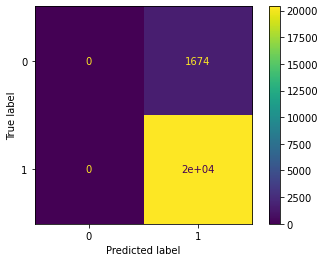

In [ ]:
# Applying the Logistic Regression Algorithm

classifier_LR = LogisticRegression(random_state = 10)

evaluate_model(classifier_LR)

While the accuracy is 92.41%, this result is considered to be poor as the model is classifying all results to "Class 1" (which comprises 92.41% of the testing set). None of the results were classified to "Class 0". As the model is intended to predict and identify patients at risk of death from sepsis, failing to predict any Class 0 patients is not acceptable.

The model may have performed poorly as Logistic Regression is a rather simple model. The problem of deaths due to sepsis may not have a more complex or non-linear relationship and therefore logistic regression may not be able to identify such patterns.

Additionally, there is a much larger number of "Class 1" (>92% survivors) than "Class 0" (<8% deceased). Hence, the model is clearly overfitting towards the majority class and fails to predict the minority class.

### 4.2 KNN

              train      test
accuracy   0.923611  0.921247
precision  0.873746  0.869144
recall     0.923611  0.921247
f1         0.891929  0.887936 

ROC-AUC score: 0.554327538873087 

              precision    recall  f1-score   support

           0       0.19      0.01      0.02      1674
           1       0.92      1.00      0.96     20395

    accuracy                           0.92     22069
   macro avg       0.56      0.50      0.49     22069
weighted avg       0.87      0.92      0.89     22069
 



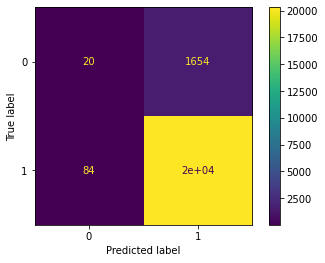

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm

classifier_KNN = KNeighborsClassifier(n_neighbors=5, leaf_size=35, metric='minkowski', p=2)

evaluate_model(classifier_KNN)

              train      test
accuracy   0.848185  0.846753
precision  0.871621  0.867402
recall     0.848185  0.846753
f1         0.859428  0.856696 

ROC-AUC score: 0.5305078639521775 

              precision    recall  f1-score   support

           0       0.12      0.16      0.14      1674
           1       0.93      0.90      0.92     20395

    accuracy                           0.85     22069
   macro avg       0.52      0.53      0.53     22069
weighted avg       0.87      0.85      0.86     22069
 



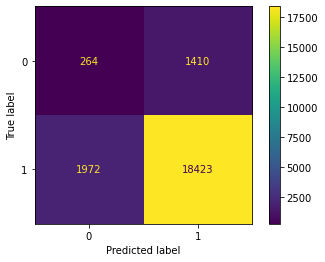

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors=1, leaf_size=35, metric='minkowski', p=2)

evaluate_model(classifier_KNN)

While KNN algorithm is able to predict some Class 0 (deceased) patients, this came with reduced accuracy (84.6%) and reduced AUC (0.53) as compared to logistic regression. 

With the AUC at 0.53, the model is considered to be fairing poorer in this aspect than logistic regression and is only marginally better than random guess.

Furthermore, a recall of 0.16 for Class 0 (deceased) is not ideal, as it means that the model is not able to effectively predict and identify patients at high risk of death from sepsis.

### 4.3 Random Forest

              train      test
accuracy   0.926942  0.923966
precision  0.906748  0.854035
recall     0.926942  0.923966
f1         0.892020  0.887625 

ROC-AUC score: 0.6971549501877934 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1674
           1       0.92      1.00      0.96     20395

    accuracy                           0.92     22069
   macro avg       0.46      0.50      0.48     22069
weighted avg       0.85      0.92      0.89     22069
 



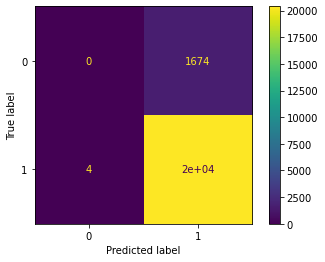

In [ ]:
# Random Forest Classifier

classifier_RF = RandomForestClassifier(random_state=10)

evaluate_model(classifier_RF)

Similar to logistic regression, the random forest classifier heavily overfits towards Class 1 (survived), with a recall of 0 for Class 0 patients.

This suggests that the features for Class 0 and Class 1 patients may be quite similar, such that the random forest is unable to distinguish between them.

### 4.4 Use of Algorithms with Cost-sensitive Learning - Support Vector Machine (SVM)

While training the SVM, use the argument `class_weight='balanced'` to penalize mistakes on the minority class by an amount proportional to how under-represented it is. In doing so, to "bias" the model to pay more attention to the minority class.

              train      test
accuracy   0.510173  0.510943
precision  0.907161  0.904854
recall     0.510173  0.510943
f1         0.614906  0.613674 

ROC-AUC score: 0.7068285471847382 

              precision    recall  f1-score   support

           0       0.12      0.81      0.20      1674
           1       0.97      0.49      0.65     20395

    accuracy                           0.51     22069
   macro avg       0.54      0.65      0.42     22069
weighted avg       0.90      0.51      0.61     22069
 



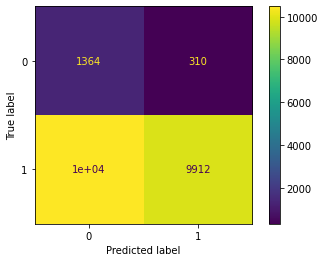

In [ ]:
# Support vector classifier / machine

classifier_SVM = SVC(kernel='linear', 
            class_weight='balanced', # penalize mistakes on the minority class
            probability=True)

evaluate_model(classifier_SVM)

While the training & test accuracy decreased substantially when using SVM (51.1%) as compared to logistic regression (92.4%), the ROC-AUC score remained similar (0.7068 for SVM, 0.7069 for logistic regression).

Notably, the use of SVM is able to predict more Class 0 (deceased) patients accurately, with a recall of 0.81 for Class 0. This means that the model is able to accurately predict 81% of patients who will die of sepsis. This result will be meaningful in helping healthcare professionals decide on which septic patient requires closer monitoring and medical attention.

## 5. Predictive Modelling (Using Neural Networks)

The results based on the classical ML alogrithms were not good, with heavy overfitting towards to majortiy class especially with the use of logistic regression, KNN and random forest.

For this section, a feedforward neural network model will be built & evaluated to compare the differences in performance.

### 5.1 Defining a function to evaluate the Neural Network model - **"evaluate_model_NN"**



To better visualise the distribution of the predictions and the classification matrix of the neural network, define a function "evaluate_model_NN" for this purpose.

In [ ]:
# Sigmoid activation function predicts a decimal value between 0 to 1
# Based on a threshold of 0.5, round off the prediction to the nearest value (class) of 0 or 1
def round_class_prediction(prediction):
  if prediction <= 0.5:
    return 0
  else:
    return 1


# Define function to evaluate Neural Network model & display confusion matrix
def evaluate_model_NN(model):

    # Evaluate the model - display validation loss, accuracy & AUC
    model.evaluate(X_test, Y_test)

    # Predict the class labels, then round off to a value of 0 or 1
    Y_test_pred = model.predict(X_test, verbose=0)
    Y_test_pred_rounded = np.vectorize(round_class_prediction)(Y_test_pred)

    # Draw the Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred_rounded)
    disp = ConfusionMatrixDisplay(cm)

    print("\n")
    print(classification_report(Y_test, Y_test_pred_rounded), "\n")

    return disp.plot()

### 5.2 Build a Neural Network with 1 Hidden Layer

As this is a binary classification problem,

*   Activation function for Hidden layer: ReLU (non-linear, fast & useful as a default activation function)
*   Activation function for Output layer: Sigmoid (useful for binary classification)
*   Loss function: binary cross-entropy (useful for binary classification)
*   Optimizer: RMSprop (useful for mini-batch training)

In [ ]:
# Trial using a Neural Network with 1 hidden layer

# Define Sequential model
model = tf.keras.models.Sequential()

# Define hidden dense layer with 16 neurons
model.add(tf.keras.layers.Dense(16, name="hidden1", input_shape=(4,), activation="relu"))

# Define output dense layer 
# As output is binary, use 1 output neuron with the Sigmoid activation function
model.add(tf.keras.layers.Dense(1, name="output", activation='sigmoid'))

# print summary of model
model.summary()

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy", "AUC"])

# Train the model, Mini-batch training
# batch_size = 32, as research suggests that this is a good starting value
history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), batch_size=32)

# The model only predicted one class of outputs

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                80        
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
2759/2759 [==============================] - 5s 2ms/step - loss: 0.2589 - accuracy: 0.9257 - auc: 0.6625 - val_loss: 0.2481 - val_accuracy: 0.9241 - val_auc: 0.7062
Epoch 2/15
2759/2759 [==============================] - 5s 2ms/step - loss: 0.2431 - accuracy: 0.9269 - auc: 0.7007 - val_loss: 0.2477 - val_accuracy: 0.9241 - val_auc: 0.7085
Epoch 3/15
2759/2759 [==============================] - 6s 2ms/step - loss: 0.2429 - accuracy: 0.9269 

The training loss & validation loss generally decreased but did not change much after the 10th epoch. 

The result of 92.41% validation accuracy & 92.69% training accuracy remained constant throughout the 15 epochs. 

Based on the classification matrix, the model predicted only Class 1 and had a recall of 0 for Class 0. Similar to the other classic machine learning algorithms, the neural network likewise overfitted heavily towards the majority class.



690/690 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.9241 - auc: 0.7060


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1674
           1       0.92      1.00      0.96     20395

    accuracy                           0.92     22069
   macro avg       0.46      0.50      0.48     22069
weighted avg       0.85      0.92      0.89     22069
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


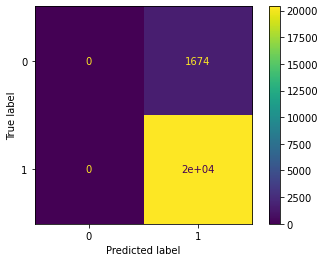

In [ ]:
# Evaluate the neural network
evaluate_model_NN(model)

In order to address the overfitting towards the majority class, apart from using SVM, oversampling and undersampling techniques will also be applied.

## 6. Addressing Data Imbalance with Over & Under-Sampling

### 6.1 Defining a function to Evaluate key Parameters after Sampling - **"evaluate_model_modified"**

In [ ]:
# Defining a function to evaulate key parameters after sampling

def evaluate_model_modified(model):
    model.fit(X_train_modified, Y_train_modified)
    Y_train_pred = model.predict(X_train_modified)
    Y_test_pred = model.predict(X_test)

    # Compute accuracy, precision, recall, F1
    train_test_error = pd.concat([measure_error(Y_train_modified, Y_train_pred, 'train'),
                                    measure_error(Y_test, Y_test_pred, 'test')],
                                    axis=1)
 
    # Compute ROC-AUC score
    Y_test_score = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_test_score)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    print(train_test_error, "\n")
    print("ROC-AUC score:", auc_score, "\n")
    print(classification_report(Y_test, Y_test_pred), "\n")

    return disp.plot()

### 6.2 Attempting Random Oversampling of the training dataset


Oversampling involves randomly duplicating observations from the minority class in order to reinforce its signal.

Below, the dataset will be oversampled such that there is an equal ratio of majority and minority class. Then re-evaluate the model using the oversampled dataset using logistic regression.

(163634, 4)
(163634,)
              train      test
accuracy   0.651594  0.575649
precision  0.656731  0.899374
recall     0.651594  0.575649
f1         0.648716  0.672051 

ROC-AUC score: 0.706202529902994 

              precision    recall  f1-score   support

           0       0.12      0.74      0.21      1674
           1       0.96      0.56      0.71     20395

    accuracy                           0.58     22069
   macro avg       0.54      0.65      0.46     22069
weighted avg       0.90      0.58      0.67     22069
 



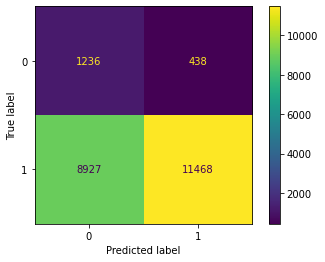

In [ ]:
# Using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=10)
X_train_modified, Y_train_modified = ros.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

# Reevaluate using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

With random oversampling, there was a large decrease in the training/testing accuracy from >92% to 65.1% and 57.5% respectively. The variance between training & testing accuracy also increased. This could have happened as "noise" from the minority dataset will also be amplified.

Despite that, the model is now able to predict the minority class labels where Class = 0 (Patients who were deceased). The recall for class 0 is 0.74, which means that the model is able to predict & detect 74% of patients who died due to sepsis.

This makes the model more meaningful as it is important to identify patients who are at higher risk of death, so that healthcare professionals can dedicate more attention to their care.

### 6.3 Attempting Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
smote = SMOTE(sampling_strategy='auto', random_state=10)
X_train_modified, Y_train_modified = smote.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

(163634, 4)
(163634,)


              train      test
accuracy   0.650831  0.573293
precision  0.656100  0.899568
recall     0.650831  0.573293
f1         0.647859  0.670026 

ROC-AUC score: 0.7062031889302172 

              precision    recall  f1-score   support

           0       0.12      0.74      0.21      1674
           1       0.96      0.56      0.71     20395

    accuracy                           0.57     22069
   macro avg       0.54      0.65      0.46     22069
weighted avg       0.90      0.57      0.67     22069
 



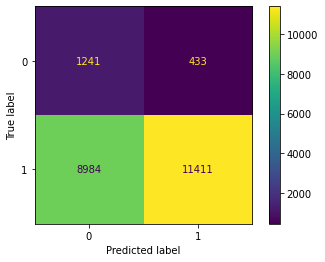

In [ ]:
# Reevaluate Using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

The results after oversampling with RandomOverSampler or SMOTE and re-evaluating using Logistic Regression are very similar.

Using both RandomOverSampler & SMOTE gave an AUC of 0.7062. Recall for Class 0 is also 0.74 for both.

### 6.4 Attempting Random Undersampling of the training dataset

Undersampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

Below, the dataset will be undersampled such that there is an equal ratio of majority and minority class. Then re-evaluate the model using the undersampled dataset using logistic regression.

(12910, 4)
(12910,)
              train      test
accuracy   0.651046  0.576148
precision  0.655865  0.899183
recall     0.651046  0.576148
f1         0.648328  0.672491 

ROC-AUC score: 0.7064661700823315 

              precision    recall  f1-score   support

           0       0.12      0.74      0.21      1674
           1       0.96      0.56      0.71     20395

    accuracy                           0.58     22069
   macro avg       0.54      0.65      0.46     22069
weighted avg       0.90      0.58      0.67     22069
 



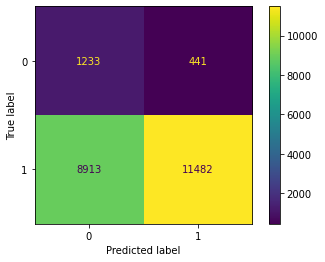

In [ ]:
# Use RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=10)
X_train_modified, Y_train_modified = rus.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

# Reevaluate undersampled dataset using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

Use of RandomUnderSampler for undersampling appears to give similar results to the use of oversampled datasets with RandomOverSampler and SMOTE.

Likewise, the accuracy decreased for both the training and testing dataset, and variance increased. This may be due to potentially useful information being discarded.

Despite that, the model will now be better able to predict Class 0 labels.

### 6.5 Combining Undersampling & Oversampling using SMOTEENN

(147435, 4)
(147435,)
              train      test
accuracy   0.696470  0.490190
precision  0.700247  0.907264
recall     0.696470  0.490190
f1         0.687628  0.593578 

ROC-AUC score: 0.7053463656698953 

              precision    recall  f1-score   support

           0       0.11      0.84      0.20      1674
           1       0.97      0.46      0.63     20395

    accuracy                           0.49     22069
   macro avg       0.54      0.65      0.41     22069
weighted avg       0.91      0.49      0.59     22069
 



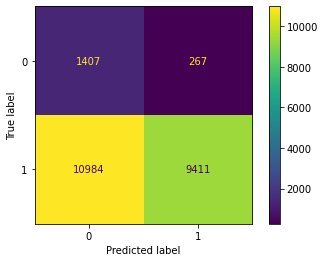

In [ ]:
# Over-sampling using SMOTE and cleaning using ENN.
# Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

smote_enn = SMOTEENN(enn=EditedNearestNeighbours(), smote=SMOTE(sampling_strategy='auto', random_state=10), random_state=10)

X_train_modified, Y_train_modified = smote_enn.fit_resample(X_train, Y_train)

print(X_train_modified.shape)
print(Y_train_modified.shape)

# Reevaluate Using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

ROC-AUC score relatively unchanged, but recall for Class 0 improved to **84%**, while maintaining a reasonable model performance (does not take too long to load).
However, Variance (difference between test and validation accuracy) have also increased.

More importantly, Recall for Class 0 increased with this dataset, which is paramount as the model is now much better able to predict patients who will die of sepsis (and is the primary objective of this project). 

Moving forward, the combined undersampled + oversampled dataset will be reapplied to train the various machine learning models.

## 7. Predictive Modelling (Classical Methods) using Combination of Oversampled + Undersampled Data

The four classic machine learning models will be re-evaluated using the SMOTEENN-modified dataset:

1.   Re-evalulate using Logistic Regression
2.   K-Nearest Neighbours
3. Re-evalulate using Random Forest
4.   Re-evaluate using SVM

### 7.1 Re-evalulate using Logistic Regression


              train      test
accuracy   0.696470  0.490190
precision  0.700247  0.907264
recall     0.696470  0.490190
f1         0.687628  0.593578 

ROC-AUC score: 0.7053463656698953 

              precision    recall  f1-score   support

           0       0.11      0.84      0.20      1674
           1       0.97      0.46      0.63     20395

    accuracy                           0.49     22069
   macro avg       0.54      0.65      0.41     22069
weighted avg       0.91      0.49      0.59     22069
 



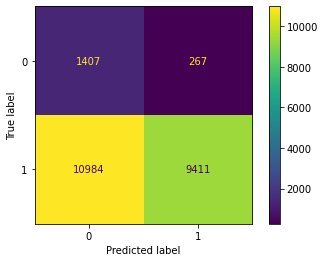

In [ ]:
# Reevaluate Using Logistic Regression
classifier_LR = LogisticRegression(random_state = 10)
evaluate_model_modified(classifier_LR)

### 7.2 Re-evaluate using K-NN

              train      test
accuracy   0.647702  0.236667
precision  0.766826  0.915194
recall     0.647702  0.236667
f1         0.578423  0.289490 

ROC-AUC score: 0.5796303911721986 

              precision    recall  f1-score   support

           0       0.09      0.96      0.16      1674
           1       0.98      0.18      0.30     20395

    accuracy                           0.24     22069
   macro avg       0.54      0.57      0.23     22069
weighted avg       0.92      0.24      0.29     22069
 



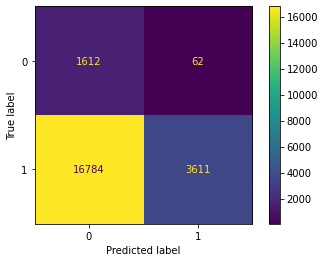

In [ ]:
# Reevaluate Using KNN
classifier_KNN = KNeighborsClassifier(n_neighbors=5, leaf_size=35, metric='minkowski', p=2)

evaluate_model_modified(classifier_KNN)

### 7.3 Re-evalulate using Random Forest

              train      test
accuracy   0.744871  0.519960
precision  0.746407  0.898993
recall     0.744871  0.519960
f1         0.741112  0.622826 

ROC-AUC score: 0.6623360230431065 

              precision    recall  f1-score   support

           0       0.11      0.77      0.20      1674
           1       0.96      0.50      0.66     20395

    accuracy                           0.52     22069
   macro avg       0.54      0.63      0.43     22069
weighted avg       0.90      0.52      0.62     22069
 



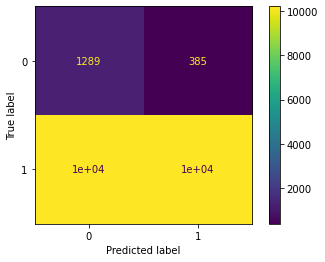

In [ ]:
# Reevaulate with Random Forest
classifier_RF = RandomForestClassifier(random_state=10)
evaluate_model_modified(classifier_RF)

### 7.4 Reevaluate using SVM

              train      test
accuracy   0.722487  0.508270
precision  0.720948  0.905825
recall     0.722487  0.508270
f1         0.718376  0.611031 

ROC-AUC score: 0.7066606124032438 

              precision    recall  f1-score   support

           0       0.12      0.82      0.20      1674
           1       0.97      0.48      0.64     20395

    accuracy                           0.51     22069
   macro avg       0.54      0.65      0.42     22069
weighted avg       0.91      0.51      0.61     22069
 



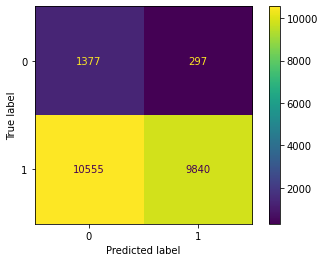

In [ ]:
from sklearn.svm import SVC

classifier_SVM = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)

evaluate_model_modified(classifier_SVM)

### 7.5 Comparing the Classical Machine Learning Models after Trainnig with the SMOTEENN-modified Dataset

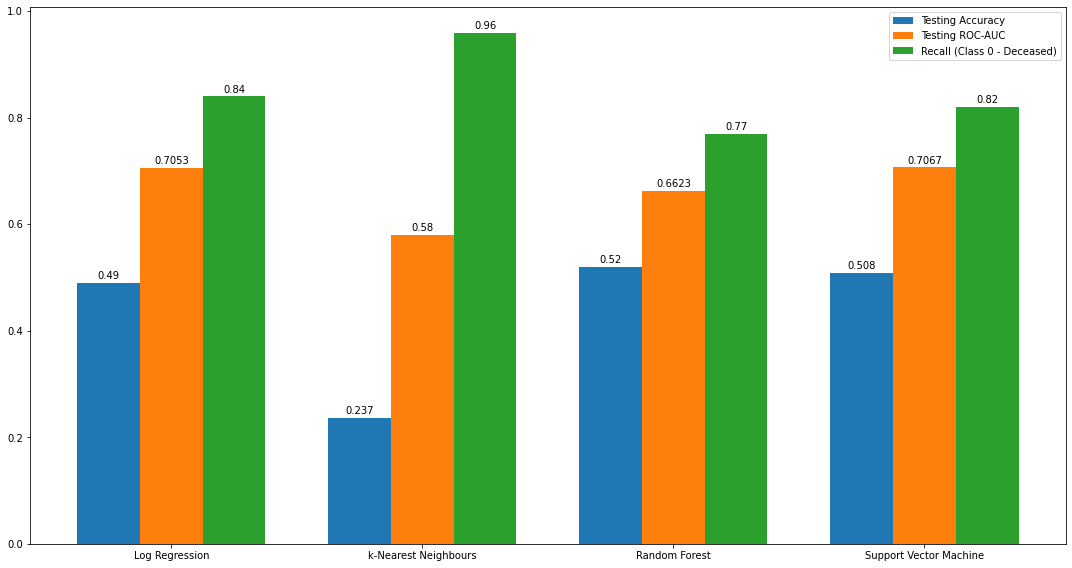

In [ ]:
label_models = ['Log Regression', 'k-Nearest Neighbours', 'Random Forest', 'Support Vector Machine']
label_test_accuracy = [0.490,0.237,0.520,0.508]
label_test_rocauc = [0.7053,0.5800,0.6623,0.7067]
label_recall_0 = [0.84,0.96,0.77,0.82]

x = np.arange(len(label_models))
width = 0.25

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width, label_test_accuracy, width, label='Testing Accuracy')
rects2 = ax.bar(x, label_test_rocauc, width, label='Testing ROC-AUC')
rects3 = ax.bar(x + width, label_recall_0, width, label='Recall (Class 0 - Deceased)')

ax.set_xticks(x)
ax.set_xticklabels(label_models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

After re-evaluating using the SMOTEENN-modified dataset, all classic machine learning algorithms were better able to accurately predict Class 0 labels. However, it also resulted in a drop of testing accuracy.

While the KNN algorithm had the highest recall of 0.96 for Class 0, it faired the worst in other metrics, with a low test accuracy of 0.237 and ROC-AUC of 0.58. This suggests possible overfitting towards the minority class instead. While it can accurately predict 96% of septic patients who are deceased, a low precision of 0.09 is not ideal as there may be large wastage of resources which may end up detrimental.

Overall, logistic regression and SVM appears to perform better among the classic ML algorithms, with Class 0 recall above 80%, accuracy approximately 50% and ROC-AUC about 0.706.

## 8. Predictive Modelling (Using Neural Networks) using Combination of Oversampled + Undersampled Data

Having obtained better results with the classic machine learning algorthims after applying SMOTEENN sampling to the dataset, the sampled dataset will likewise be applied to a neural network and performance of the network evaluated.  

As this is a binary classification problem,

<!-- *   Activation function for Output layer: Sigmoid -->
*   Loss function: to use binary cross-entropy
*   Optimizer: try Gradient descent, RMSprop, Adam, Adamax
*   Metrics: Accuracy


### 8.1 KerasTuner
Use KerasTuner to find the best set of hyperparameters for the neural network. 

https://keras.io/guides/keras_tuner/getting_started/

In [ ]:
## Import KerasTuner
!pip install keras-tuner -q
import keras_tuner

     |████████████████████████████████| 135 kB 14.0 MB/s 
     |████████████████████████████████| 1.6 MB 76.5 MB/s 


Hyperparameters & aspects of the neural network architecture to be assessed include:

*   Number of neurons to be used in the hidden layer (First layer: range of 8 to 40. Second layer: range of 8 to 24)
*   Whether to use one or two hidden layers
*   Activation function to use for each hidden layer (ReLU, Hyperbolic Tangent or Softplus)
*   Optimizer to use (RMSprop, Adam or Adamax)
*   Training batch size (32, 64 or 128)

The options above were derived based on initial runs of KerasTuner which provided a range of hyperparameters that tended to provide better performance.


Activation function for output layer & loss function will not be varied as this is dependent on the nature of the machine learning problem. As this is a binary classification problem, 
* Activation function for Output layer: Sigmoid
* Loss function: Binary cross-entropy

In [ ]:
from tensorflow.keras import layers

class MyHyperModel(keras_tuner.HyperModel):

# Tune the architecture of the neural network
    def build(self, hp):
        model = keras.Sequential()
        
        # Tune first hidden layer
        model.add(
            layers.Dense(
                # Tune number of neuron units
                units=hp.Int("units1", min_value=8, max_value=40, step=8),
                # Tune the activation function to use.
                activation=hp.Choice("activation1", ["relu", "tanh", "softplus"]),
                input_shape=(4,)
            )
        )

        # Decide whether to use 2nd hidden layer
        if hp.Boolean("hidden2"):
            model.add(
                layers.Dense(
                    # If 2nd hidden layer is used, tune number of units & activation function to use
                    units=hp.Int("units2", min_value=8, max_value=24, step=8),
                    activation=hp.Choice("activation2", ["relu", "tanh", "softplus"])
                    )
                )

        # Output layer
        model.add(
            layers.Dense(1, name="output",activation="sigmoid"))

        model.compile(
            optimizer=hp.Choice("optimizer", ["rmsprop","adam","adamax"]),
            loss="binary_crossentropy",
            metrics=["accuracy","AUC"]
        )
        return model

# Tune the training parameters of the neural network
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tune batch size
            batch_size=hp.Choice("batch_size", [32, 64, 128]),
            **kwargs,
        )


In [ ]:
MyHyperModel(keras_tuner.HyperParameters())

KerasTuner will trial 30 different combinations of hyperparameters, and identify the best combination based on which gave the highest validation AUC.

Validation accuracy is not picked as the evaluation metric as it was seen in the earlier  sections that it does not provide accurate insights on the performance of the model due to the imbalanced dataset nor any information on the recall of Class 0 (deceased patients). Instead, ROC-AUC will be used as it represents the likelihood of the model distinguishing observations from two classes.

In [ ]:
tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective=keras_tuner.Objective("val_auc", direction="max"),
    max_trials=30,
    overwrite=True,
    directory="my_dir",
    project_name="ITI106_sepsis_onelayer",
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 40, 'step': 8, 'sampling': None}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'softplus'], 'ordered': False}
hidden2 (Boolean)
{'default': False, 'conditions': []}
optimizer (Choice)
{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam', 'adamax'], 'ordered': False}


In [ ]:
# Search for the best combination of hyperparameters over 5 epochs 
# Will stop training if the "val_loss" hasn't improved in 2 epochs.
tuner.search(X_train_modified, Y_train_modified, epochs=5, validation_data=(X_test, Y_test), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

Trial 30 Complete [00h 00m 22s]
val_auc: 0.7094318866729736

Best val_auc So Far: 0.7101040482521057
Total elapsed time: 00h 17m 05s


In [ ]:
# Display the 10 best combinations with the highest ROC-AUC score
tuner.results_summary()

Results summary
Results in my_dir/ITI106_sepsis_onelayer
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 24
activation1: softplus
hidden2: True
optimizer: adam
batch_size: 32
units2: 24
activation2: relu
Score: 0.7101040482521057
Trial summary
Hyperparameters:
units1: 24
activation1: relu
hidden2: False
optimizer: adamax
batch_size: 64
units2: 16
activation2: relu
Score: 0.7098249197006226
Trial summary
Hyperparameters:
units1: 16
activation1: tanh
hidden2: True
optimizer: rmsprop
batch_size: 64
units2: 8
activation2: relu
Score: 0.7097371816635132
Trial summary
Hyperparameters:
units1: 40
activation1: tanh
hidden2: True
optimizer: adamax
batch_size: 32
units2: 8
activation2: tanh
Score: 0.7097166776657104
Trial summary
Hyperparameters:
units1: 16
activation1: relu
hidden2: False
optimizer: rmsprop
batch_size: 64
units2: 16
activation2: tanh
Score: 0.7096531391143799
Trial summary
Hyperparameters:
units1: 16
activation1: softplus
hidden2: True
optimizer: adamax
batch_size

### 8.2 Building the Neural Network Model based on the best set of Hyperparameters from KerasTuner

Based on KerasTuner, the set of model Hyperparameters that gave the best validation AUC score was identified.


```
# 1st hidden layer
units1: 24
activation1: softplus

# 2nd hidden layer
hidden2: True
units2: 24
activation2: relu

optimizer: adam
batch_size: 32

ROC-AUC Score: 0.7101040482521057
```

The neural network will now be built based on these combination of values.


In [ ]:
# Model the NN architecture based on the results of the best combination from KerasTuner

# Define Sequential model
model = keras.models.Sequential()

# 1st hidden dense layer
model.add(keras.layers.Dense(24, name="hidden1", input_shape=(4,), activation="softplus"))

# 2nd hidden dense layer
model.add(keras.layers.Dense(24, name="hidden2", activation="relu"))

# Define output dense layer 
model.add(keras.layers.Dense(1, name="output", activation="sigmoid"))

# print summary of model
model.summary()

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy","AUC"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 24)                120       
                                                                 
 hidden2 (Dense)             (None, 24)                600       
                                                                 
 output (Dense)              (None, 1)                 25        
                                                                 
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


Add a checkpoint prior to training the model, so that it is easier to reset and trial different values of training variables later.

In [ ]:
model.save_weights("initial_weights.chk")

### 8.3.1 Trial 1: Train with 30 epochs

Train the model with a larger number of epochs = 30, and observe how key metrics (including AUC, accuracy & loss) varies with increasing number of epochs.

Batch size = 32 is applied based on the combination obtained from KerasTuner.

In [ ]:
# Train the model
history = model.fit(X_train_modified, Y_train_modified, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
4608/4608 [==============================] - 11s 2ms/step - loss: 0.5796 - accuracy: 0.6941 - auc: 0.7437 - val_loss: 0.7476 - val_accuracy: 0.4883 - val_auc: 0.7091
Epoch 2/30
4608/4608 [==============================] - 14s 3ms/step - loss: 0.5773 - accuracy: 0.6956 - auc: 0.7462 - val_loss: 0.7409 - val_accuracy: 0.4913 - val_auc: 0.7077
Epoch 3/30
4608/4608 [==============================] - 11s 2ms/step - loss: 0.5771 - accuracy: 0.6956 - auc: 0.7461 - val_loss: 0.7091 - val_accuracy: 0.5099 - val_auc: 0.7084
Epoch 4/30
4608/4608 [==============================] - 11s 2ms/step - loss: 0.5769 - accuracy: 0.6953 - auc: 0.7465 - val_loss: 0.7598 - val_accuracy: 0.4709 - val_auc: 0.7086
Epoch 5/30
4608/4608 [==============================] - 11s 2ms/step - loss: 0.5765 - accuracy: 0.6958 - auc: 0.7468 - val_loss: 0.8131 - val_accuracy: 0.4348 - val_auc: 0.7092
Epoch 6/30
4608/4608 [==============================] - 12s 3ms/step - loss: 0.5761 - accuracy: 0.6955 - auc: 0.747

690/690 [==============================] - 1s 2ms/step - loss: 0.7865 - accuracy: 0.4416 - auc: 0.7034


              precision    recall  f1-score   support

           0       0.11      0.88      0.19      1674
           1       0.98      0.41      0.57     20395

    accuracy                           0.44     22069
   macro avg       0.54      0.64      0.38     22069
weighted avg       0.91      0.44      0.54     22069
 



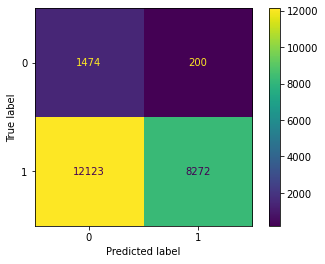

In [ ]:
# Evaluate the model & plot the confusion matrix
evaluate_model_NN(model)

With 30 epochs, the accuracy was 44.16% and ROC-AUC 0.7034, which faired slightly poorer compared to Logistic Regression & SVM. However, recall for Class 0 was better at 88%.

The ROC-AUC with 30 epochs is 0.7034, which is poorer than the 0.7101 obtained when tuning with KerasTuner (albeit with only 5 epochs). It appears that model did not fair as well as expected with 30 epochs. 

The line graph below will be drawn to plot & observe the trend in loss, accuracy & AUC with increasing number of epochs. This information will be useful to determine if the number of epochs can be optimised.

In [ ]:
# Define function to plot loss, accuracy & auc for the model

def plot_loss_acc_auc(epochs):
  history_dict = history.history

  fig, (p1, p2, p3) = plt.subplots(1, 3, figsize=(25,5))

  x = range(1, epochs+1)

  # Plot training vs validation Loss
  p1.plot(x, history_dict['loss'], 'r', label='Training Loss')
  p1.plot(x, history_dict['val_loss'], 'b', label='Validation Loss')
  p1.set_title('Training and Validation Loss')
  p1.set_xlabel('Epochs')
  p1.set_ylabel('Loss')
  p1.legend()

  # Plot training vs validation Accuracy 
  p2.plot(x, history_dict['accuracy'], 'r', label='Training Accuracy')
  p2.plot(x, history_dict['val_accuracy'], 'b', label='Validation Accuracy')
  p2.set_title('Training and Validation Accuracy')
  p2.set_xlabel('Epochs')
  p2.set_ylabel('accuracy')
  p2.legend()

  # Plot training vs validation ROC-AUC
  p3.plot(x, history_dict['auc'], 'r', label='Training ROC-AUC')
  p3.plot(x, history_dict['val_auc'], 'b', label='Validation ROC-AUC')
  p3.set_title('Training and Validation ROC-AUC')
  p3.set_xlabel('Epochs')
  p3.set_ylabel('ROC-AUC')
  p3.legend()

  return plt.show()

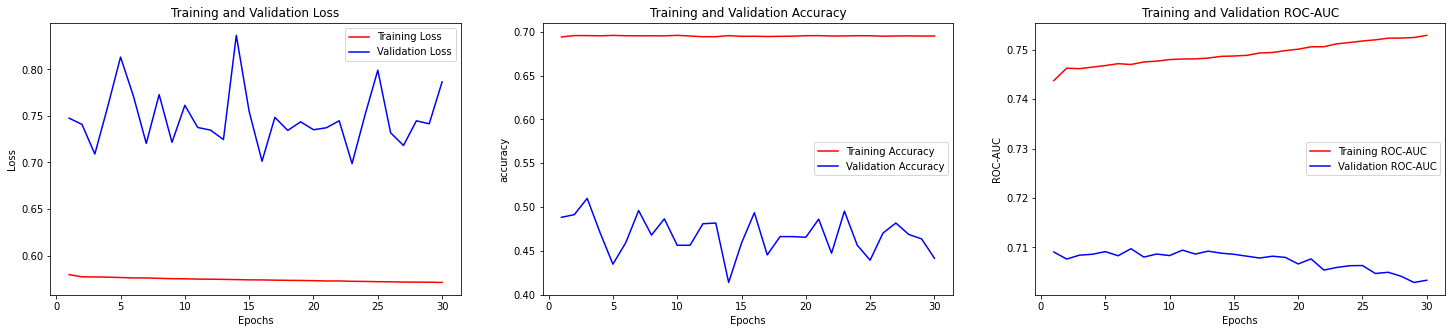

In [ ]:
# Plot loss, accuracy & auc for the model
plot_loss_acc_auc(30)

It appears that the model may be overfitting.

A possible consideration is to apply L1/L2 regularisation or dropout layers. However, as the training accuracy for is already low, regularisation with L1/L2 or dropout layers may lead to increase in bias & further decreasing of the accuracy.

Instead, early stopping method will be utilised. Number of epochs will be lowered to 10, as there isn't any significant improvement in the training or validation loss after the 7th epoch.

### 8.3.2 Trial 2: Train with 7 epochs

In [ ]:
# Restore the model to the previously saved checkpoint
model.load_weights("initial_weights.chk")

In [ ]:
# Train the model, this time using 7 epochs
history = model.fit(X_train_modified, Y_train_modified, epochs=7, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/7
4608/4608 [==============================] - 12s 3ms/step - loss: 0.5804 - accuracy: 0.6937 - auc: 0.7430 - val_loss: 0.7430 - val_accuracy: 0.4947 - val_auc: 0.7079
Epoch 2/7
4608/4608 [==============================] - 12s 3ms/step - loss: 0.5770 - accuracy: 0.6959 - auc: 0.7463 - val_loss: 0.8024 - val_accuracy: 0.4412 - val_auc: 0.7083
Epoch 3/7
4608/4608 [==============================] - 12s 3ms/step - loss: 0.5763 - accuracy: 0.6963 - auc: 0.7469 - val_loss: 0.7457 - val_accuracy: 0.4674 - val_auc: 0.7093
Epoch 4/7
4608/4608 [==============================] - 12s 3ms/step - loss: 0.5758 - accuracy: 0.6959 - auc: 0.7469 - val_loss: 0.7712 - val_accuracy: 0.4595 - val_auc: 0.7093
Epoch 5/7
4608/4608 [==============================] - 13s 3ms/step - loss: 0.5756 - accuracy: 0.6956 - auc: 0.7471 - val_loss: 0.7736 - val_accuracy: 0.4727 - val_auc: 0.7087
Epoch 6/7
4608/4608 [==============================] - 14s 3ms/step - loss: 0.5752 - accuracy: 0.6958 - auc: 0.7476 - va

690/690 [==============================] - 1s 2ms/step - loss: 0.7295 - accuracy: 0.4756 - auc: 0.7104


              precision    recall  f1-score   support

           0       0.11      0.87      0.20      1674
           1       0.98      0.44      0.61     20395

    accuracy                           0.48     22069
   macro avg       0.54      0.65      0.41     22069
weighted avg       0.91      0.48      0.58     22069
 



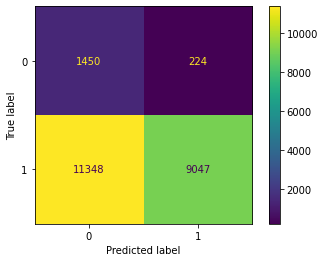

In [ ]:
# Evaluate the model & plot the confusion matrix
evaluate_model_NN(model)

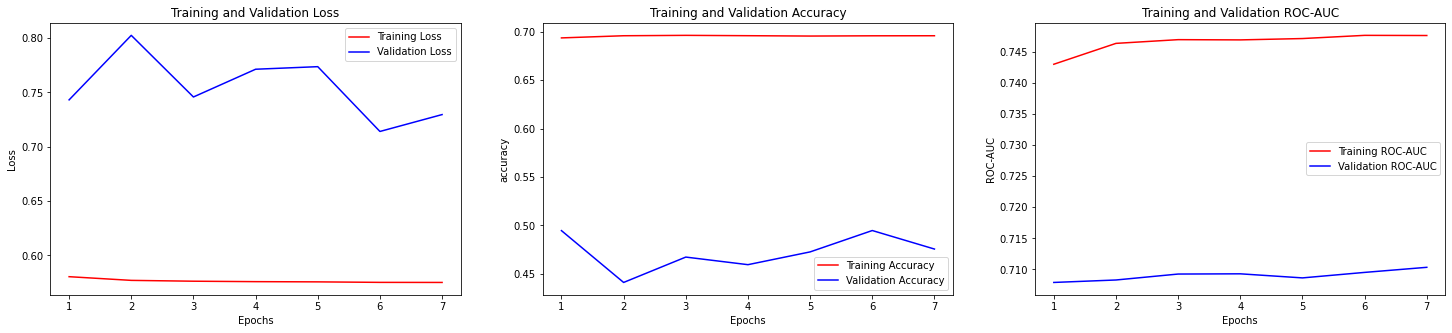

In [ ]:
# Plot loss, accuracy & auc for the model
plot_loss_acc_auc(7)

With earlier stopping after 7 epochs, the model faired better and reduced the issue of overfitting when 30 epochs were used. Validation ROC-AUC improved from 0.7034 (30 epochs) to 0.7104 (7 epochs), validation accuracy improved slightly from 0.4416 (30 epochs) to 0.4756 (7 epochs), while Recall for Class 0 is approximately the same at 0.87.

## 9. Conclusions

Comparing the performance between models:

*   Sampled vs Unsampled (Imbalanced)
*   Neural Network vs Classic Machine Learning Algorithms (Logistic regression / SVM, which tended to fair better)



In [ ]:
model_parameters = pd.DataFrame({
    'Model':['(Imbalanced) Log Regression','(Imbalanced) SVM','(Imbalanced) Neural Network','(Sampled) Log Regression','(Sampled) SVM','(Sampled) Neural Network'],
    'Testing Accuracy':[0.9241,0.5109,0.9241,0.4902,0.5083,0.4756],
    'Testing ROC-AUC':[0.7069,0.7068,0.7070,0.7053,0.7067,0.7104],
    'Recall (Class 0 - Deceased)':[0,0.81,0,0.84,0.82,0.87]
    })

# model_parameters

sorted_model_parameters = model_parameters.sort_values(by = "Recall (Class 0 - Deceased)",ascending=False)
sorted_model_parameters

,Model,Testing Accuracy,Testing ROC-AUC,Recall (Class 0 - Deceased)
5,(Sampled) Neural Network,0.4756,0.7104,0.87
3,(Sampled) Log Regression,0.4902,0.7053,0.84
4,(Sampled) SVM,0.5083,0.7067,0.82
1,(Imbalanced) SVM,0.5109,0.7068,0.81
0,(Imbalanced) Log Regression,0.9241,0.7069,0.00
2,(Imbalanced) Neural Network,0.9241,0.7070,0.00


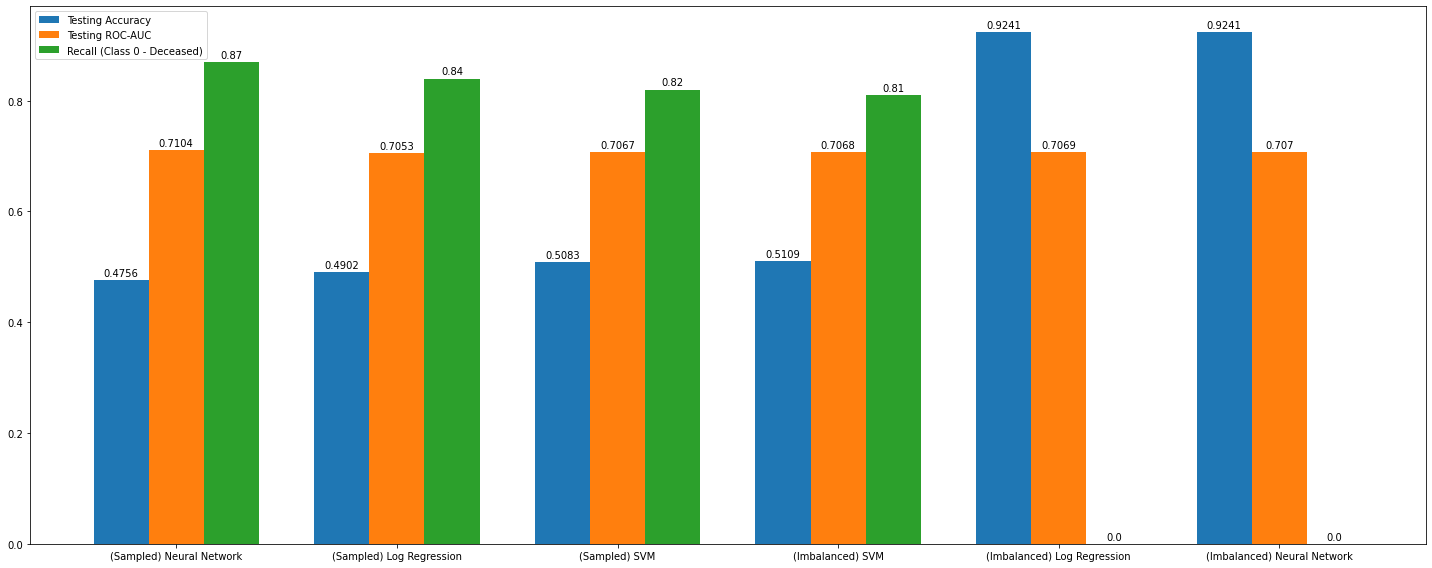

In [ ]:
label_models = list(sorted_model_parameters['Model'])
label_test_accuracy = list(sorted_model_parameters['Testing Accuracy'])
label_test_rocauc = list(sorted_model_parameters['Testing ROC-AUC'])
label_recall_0 = list(sorted_model_parameters['Recall (Class 0 - Deceased)'])

x = np.arange(len(label_models))
width = 0.25

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width, label_test_accuracy, width, label='Testing Accuracy')
rects2 = ax.bar(x, label_test_rocauc, width, label='Testing ROC-AUC')
rects3 = ax.bar(x + width, label_recall_0, width, label='Recall (Class 0 - Deceased)')

ax.set_xticks(x)
ax.set_xticklabels(label_models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

*Use of Sampling*

Applying a combination of SMOTE for oversampling and undersampling with ENN on the imbalanced dataset helped greatly in reducing the overfitting towards the majority class. Prior to sampling, the logistic regression algorithm and neural network only predicted Class 1 (survived) labels, but with sampling were now able to predict Class 0 (Deceased) labels with a recall of 0.84 and 0.87 respectively. This was done without much differences to the ROC-AUC, which maintained at approximately 0.71, suggesting that the model is able to distinguish between Class 0 and Class 1 labels to a fair extent (better than a random-guess AUC value of 0.5). Hence, application of SMOTEENN to the dataset made the model more applicable and useful in identifying septic patients at risk of death.

<br>

*Comparing Between Classic ML Algorithms & Neural Network*

Comparing the performance between classic ML algorithms and neural network, their performances were generally similar but the neural network faired marginally better with higher ROC-AUC and Class 0 Recall but slightly lower validation accuracy. 

The improvement (in ROC-AUC and Class 0 Recall) may be attributed to the use of KerasTuner in finding the best combination of hyperparameters for the model, by tuning the parameters such as number of neurons, number of hidden layers, activation function, optimiser and batch size. Additionally, neural networks are also better able to handle more complex problems, perform automatic feature learning and improve it's performance with a larger set of data (after applying SMOTEENN, there are 147435 rows of data). These factors combined likely allowed the model to better identify patients at high risk of death, and this difference (although not numerically not large) will allow healthcare professionals to direct attention towards high risk patients and save more lives.

While neural networks delivered better prediction results, it did not perform as well in terms of computational performance. Neural networks are more computationally complex and expensive, which therefore took a much longer time to tune and train compared to most classic machine learning algorithms like logistic regression or KNN (except SVM). Neural networks may also be prone to overfitting especially in smaller datasets, however this was avoided as the dataset utilised in this project is fairly large.

<br>

*Future Work*

Other machine learning methods for outlier detection may be explored in the future, such as use of clustering techniques or different types of neural networks such as AutoEncoder.

The dataset may also be improved on, by finding more samples with label Class 0 (deceased) to balance out the ratio of class 0 and class 1 labels. Although in reality, this could be difficult as with current medical advancements and care, a bulk of patients generally do not die from sepsis.
